/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 44s 56ms/step - accuracy: 0.7705 - loss: 0.7090 - val_accuracy: 0.9787 - val_loss: 0.0727
Epoch 2/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 39s 52ms/step - accuracy: 0.9572 - loss: 0.1448 - val_accuracy: 0.9858 - val_loss: 0.0490
Epoch 3/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 39s 51ms/step - accuracy: 0.9692 - loss: 0.1048 - val_accuracy: 0.9862 - val_loss: 0.0463
Epoch 4/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 41s 52ms/step - accuracy: 0.9740 - loss: 0.0832 - val_accuracy: 0.9877 - val_loss: 0.0401
Epoch 5/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 41s 52ms/step - accuracy: 0.9780 - loss: 0.0716 - val_accuracy: 0.9895 - val_loss: 0.0387
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9869 - loss: 0.0402

Test accuracy: 0.9897
Test loss: 0.0322


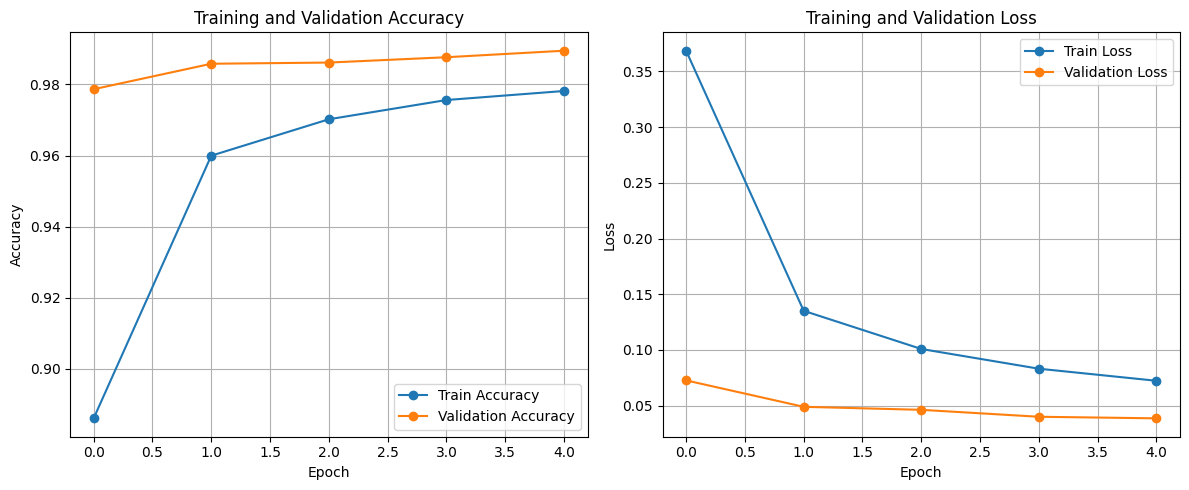

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


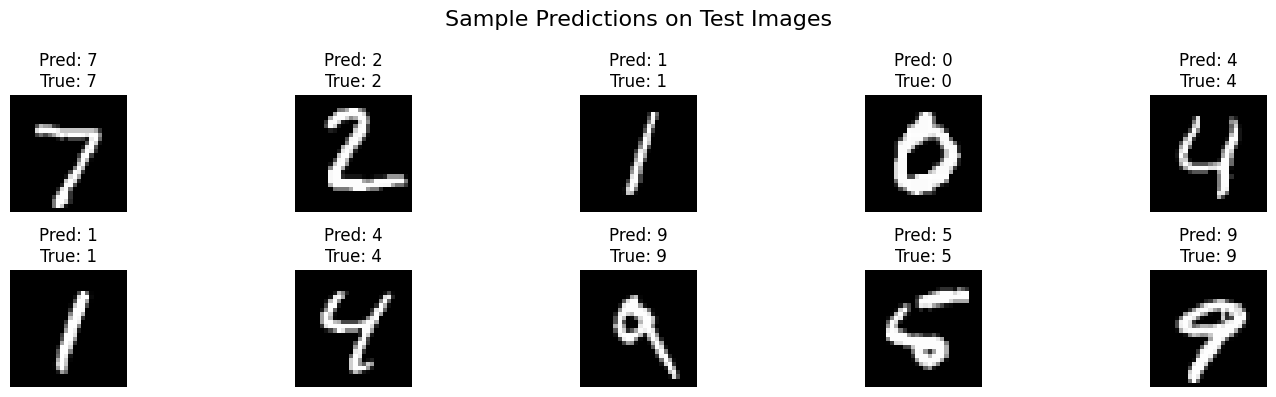

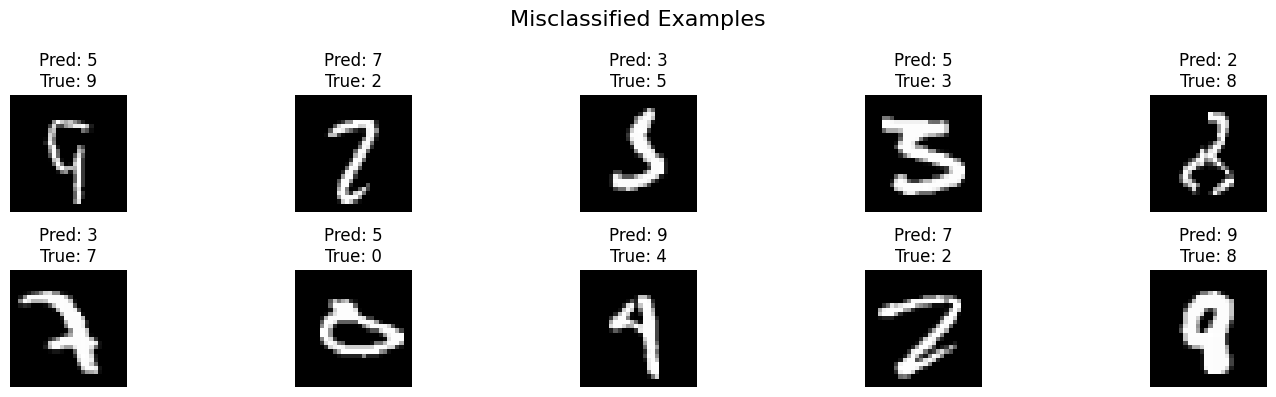

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np

# Load and preprocess data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images / 255.0
test_images = test_images / 255.0
train_images = train_images.reshape(-1, 28, 28, 1)
test_images = test_images.reshape(-1, 28, 28, 1)

# Build model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Compile model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train model
history = model.fit(train_images, train_labels,
                    epochs=5,
                    batch_size=64,
                    validation_split=0.2)

# Evaluate model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"\nTest accuracy: {test_acc:.4f}")
print(f"Test loss: {test_loss:.4f}")

# Plot training history
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Make predictions
predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)

# Visualize sample predictions
num_samples = 10
plt.figure(figsize=(15, 4))
for i in range(num_samples):
    plt.subplot(2, 5, i + 1)  # Changed to 2 rows, 5 columns for better layout
    plt.imshow(test_images[i].reshape(28, 28), cmap='gray')
    plt.title(f"Pred: {predicted_labels[i]}\nTrue: {test_labels[i]}")
    plt.axis('off')

plt.suptitle("Sample Predictions on Test Images", fontsize=16)
plt.tight_layout()
plt.show()

# Additional: Show some misclassified examples
misclassified_idx = np.where(predicted_labels != test_labels)[0]
if len(misclassified_idx) > 0:
    num_misclassified = min(10, len(misclassified_idx))
    plt.figure(figsize=(15, 4))
    plt.suptitle("Misclassified Examples", fontsize=16)
    for i, idx in enumerate(misclassified_idx[:num_misclassified]):
        plt.subplot(2, 5, i + 1)
        plt.imshow(test_images[idx].reshape(28, 28), cmap='gray')
        plt.title(f"Pred: {predicted_labels[idx]}\nTrue: {test_labels[idx]}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()